There are several approaches to using probabilistic modeling for classification tasks, e. g. Bayesian Neural Networks and Gaussian Process Models. Here, I decided to present Bayesian logistic regression as a means to solve a classification problem (please see https://pymc-devs.github.io/pymc3/notebooks/GLM-logistic.html and http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

### Setup the system

In [1]:
%matplotlib inline

import pandas as pd
import pymc3  as pm

### Access the data

In [2]:
df_data = pd.read_csv('https://raw.githubusercontent.com/LEggert/Probabilistic-Programming/master/use_case_classification/use_case_classification_data.csv')

In [3]:
df_data.shape

(4521, 17)

In [4]:
df_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Build the model

In [5]:
df_data = df_data.replace({'y': {'no': 0, 'yes': 1}})

In [6]:
data = df_data[['balance', 'day', 'duration', 'y']].iloc[:200]

Here, we use the R-style syntax for convenience:

In [7]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula('y ~ balance + day + duration', data, family=pm.glm.families.Binomial())
    trace_logistic_model = pm.sample(4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 4492/4500 [00:21<00:00, 294.52it/s]/Users/Lucas/anaconda/envs/py36/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.945419104236, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 4500/4500 [00:21<00:00, 210.48it/s]


### Analyse the model

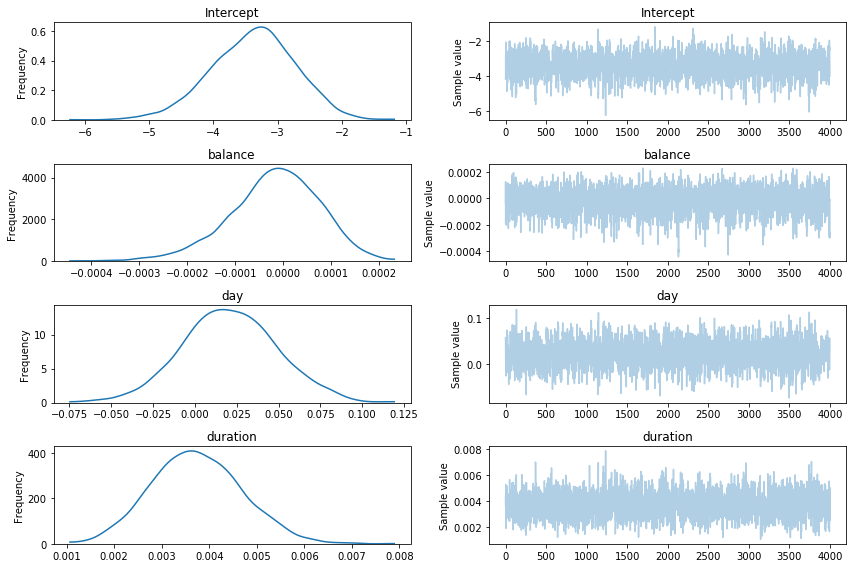

In [8]:
_ = pm.traceplot(trace_logistic_model)